#### Importing dependencies

In [177]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, LinearRegression,  Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


#### Data Collection and Processing

In [178]:
car_data = pd.read_csv("C:/Users/USER/Desktop/Datasets/cars_data.csv")

# renaming column names
car_data = car_data.rename(columns={
    'fuel': 'fuel_type',
    'transmission': 'transmission_type',
    'owner': 'ownership_type'
})

car_data.head()

,name,year,selling_price,km_driven,fuel_type,seller_type,transmission_type,ownership_type
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [179]:
#Checking the number of rows and columns
car_data.shape

(4340, 8)

In [180]:
#Checking for missing values and datatypes
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               4340 non-null   object
 1   year               4340 non-null   int64 
 2   selling_price      4340 non-null   int64 
 3   km_driven          4340 non-null   int64 
 4   fuel_type          4340 non-null   object
 5   seller_type        4340 non-null   object
 6   transmission_type  4340 non-null   object
 7   ownership_type     4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


##### Checking categories distribution

In [181]:
print("",car_data.fuel_type.value_counts())

 fuel_type
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64


In [182]:
print("",car_data.seller_type.value_counts())

 seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64


In [183]:
print("",car_data.transmission_type.value_counts())

 transmission_type
Manual       3892
Automatic     448
Name: count, dtype: int64


In [184]:
print("",car_data.ownership_type.value_counts())

 ownership_type
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


#### Cleaning 

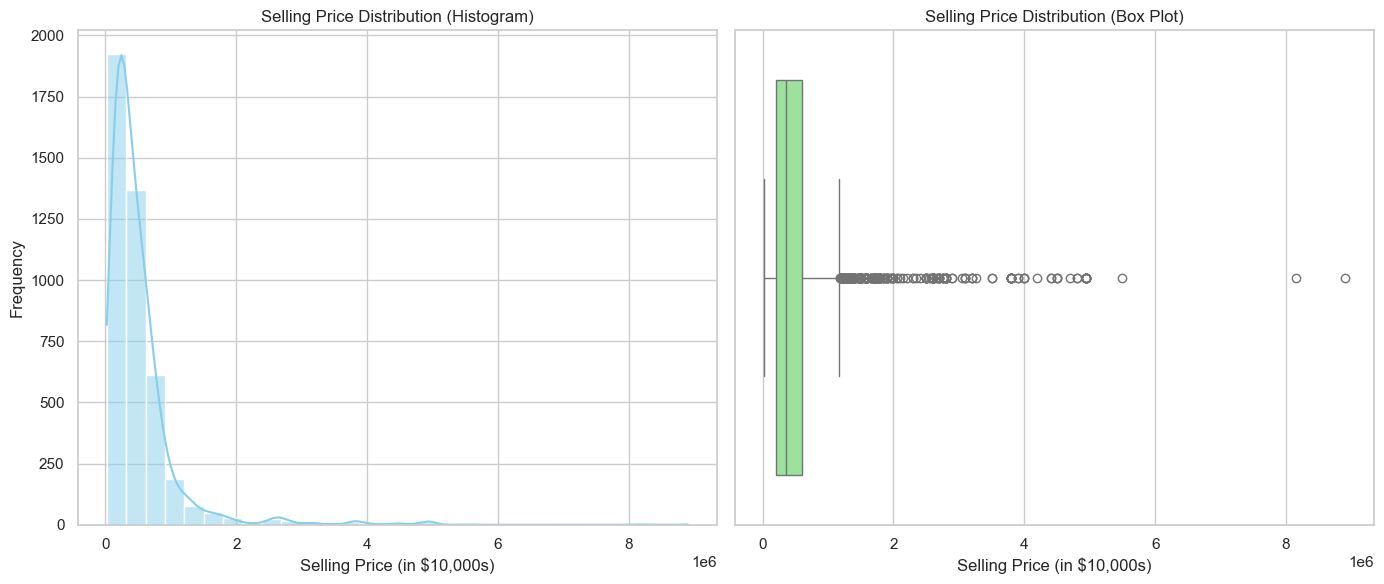

In [185]:
# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram of selling_price
sns.histplot(car_data['selling_price'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Selling Price Distribution (Histogram)')
axes[0].set_xlabel('Selling Price (in $10,000s)')
axes[0].set_ylabel('Frequency')

# Boxplot of selling_price
sns.boxplot(x=car_data['selling_price'], ax=axes[1], color='lightgreen')
axes[1].set_title('Selling Price Distribution (Box Plot)')
axes[1].set_xlabel('Selling Price (in $10,000s)')

plt.tight_layout()
plt.show()

In [186]:
# Calculate IQR
Q1 = car_data['selling_price'].quantile(0.25)
Q3 = car_data['selling_price'].quantile(0.75)
IQR = Q3 - Q1

# Define upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
car_data = car_data[car_data['selling_price'] <= upper_bound]


In [187]:
#Checking the number of rows and columns
car_data.shape

(4069, 8)

##### Encoding the Categorical data 

In [188]:
pd.set_option('future.no_silent_downcasting', True)

# encoding the fuel type 
car_data.replace(
    {'fuel_type': 
         {'Diesel':0,
          'Petrol':1,
          'CNG':2,
          'LPG':3,
          'Electric':4
     }
    }, inplace=True)

# encoding the seller type 
car_data.replace(
    {'seller_type': 
         {'Individual':0, 
          'Dealer':1, 
          'Trustmark Dealer':2
     }
    }, inplace=True)

# encoding the transmission type 
car_data.replace(
    {'transmission_type':
        {'Manual':0,
         'Automatic':1
      }
    }, inplace=True)

# encoding the transmission type 
car_data.replace({
    'ownership_type': {
        'First Owner': 0,
        'Second Owner': 1,
        'Third Owner': 2,
        'Fourth & Above Owner': 3,
        'Test Drive Car': 4
    }
}, inplace=True)


# Scale down selling_price by dividing by 10,000 (e.g., from dollars to units of $1000)
car_data['selling_price'] = car_data['selling_price'] / 10000
# Ensure the column is of float type for modeling precision
car_data['selling_price'] = car_data['selling_price'].astype(float)

# Explicitly convert to integer
car_data['fuel_type'] = car_data['fuel_type'].astype('int64')
car_data['seller_type'] = car_data['seller_type'].astype('int64') 
car_data['transmission_type'] = car_data['transmission_type'].astype('int64')
car_data['transmission_type'] = car_data['ownership_type'].astype('int64')

In [189]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4069 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               4069 non-null   object 
 1   year               4069 non-null   int64  
 2   selling_price      4069 non-null   float64
 3   km_driven          4069 non-null   int64  
 4   fuel_type          4069 non-null   int64  
 5   seller_type        4069 non-null   int64  
 6   transmission_type  4069 non-null   int64  
 7   ownership_type     4069 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 286.1+ KB


In [190]:
car_data.head()
print(car_data['selling_price'].min())

2.0


#### Splitting the data and label

In [191]:
X = car_data.drop(['name', 'selling_price', 'ownership_type'], axis=1)
Y = car_data['selling_price']

#### Splitting the data into Training and Test data

In [192]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=13)

### Rough codes

###  1. Linear Regression

In [75]:
lin_reg_model = LinearRegression()

In [76]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

#### Model Evaluation

In [77]:
# Prediction on training data 
training_data_prediction = lin_reg_model.predict(X_train)

In [78]:
# R2 error
R2_score = r2_score(Y_train, training_data_prediction)
# RMSE error
RMSE_score = mean_squared_error(Y_train, training_data_prediction)

In [79]:
print('R squared error :', R2_score)
print('Root mean squared error :', RMSE_score)

R squared error : 0.48724750932072514
Root mean squared error : 17.69062635706455


#### Visualise the Actual prices and Predicted prices(training data)

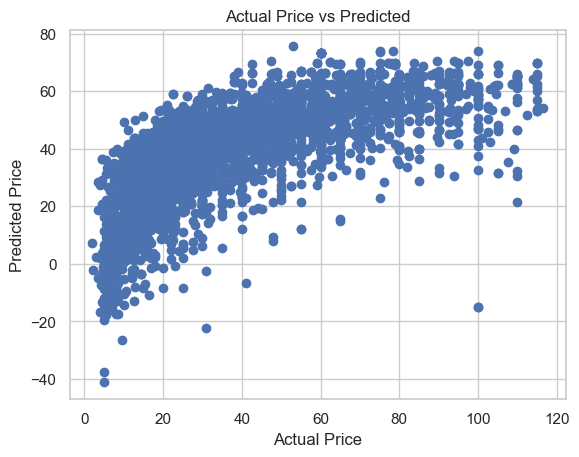

In [80]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted')
plt.show()

In [81]:
# Prediction on training data 
test_data_prediction = lin_reg_model.predict(X_test)

In [82]:
# R2 error
R2_score = r2_score(Y_test, test_data_prediction)
# RMSE error
RMSE_score = mean_squared_error(Y_test, test_data_prediction)

In [83]:
print('R squared error :', R2_score)
print('Root mean squared error :', RMSE_score)

R squared error : 0.5001439517945253
Root mean squared error : 18.1725735640238


#### Visualise the Actual prices and Predicted prices(test data)

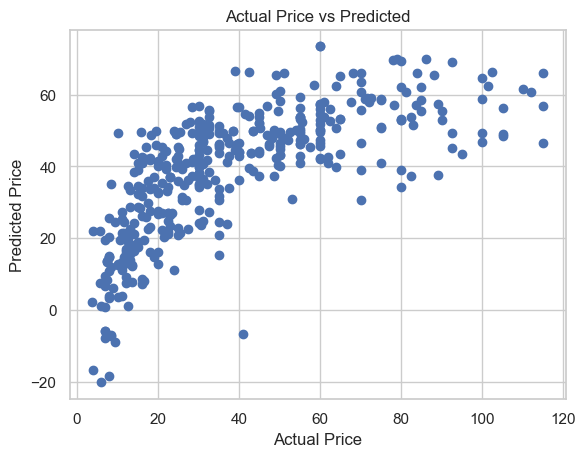

In [84]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted')
plt.show()

### 2. Lasso

In [85]:
lasso_reg_model = Lasso()

In [86]:
lasso_reg_model.fit(X_train, Y_train)

Lasso()

#### Model Evaluation

In [87]:
# Prediction on training data 
training_data_prediction = lasso_reg_model.predict(X_train)

In [88]:
# R2 error
R2_score = r2_score(Y_train, training_data_prediction)
# RMSE error
RMSE_score = root_mean_squared_error(Y_train, training_data_prediction)

In [89]:
print('R squared error :', R2_score)
print('Root mean squared error :', RMSE_score)

R squared error : 0.47429840391943634
Root mean squared error : 17.912614041118264


#### Visualise the Actual prices and Predicted prices(training data)

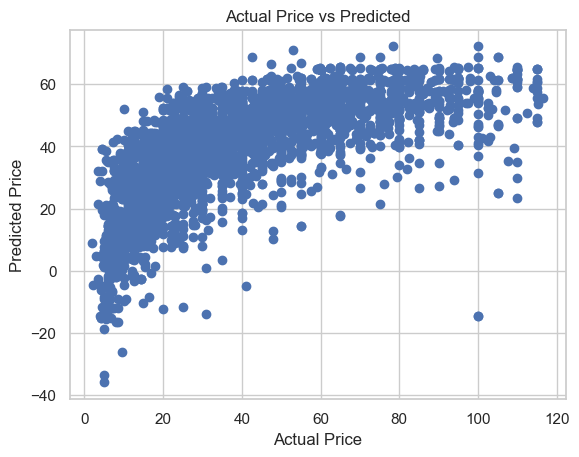

In [90]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted')
plt.show()

In [91]:
# Prediction on training data 
test_data_prediction = lasso_reg_model.predict(X_test)

In [92]:
# R2 error
R2_score = r2_score(Y_test, test_data_prediction)
# RMSE error
RMSE_score = mean_squared_error(Y_test, test_data_prediction)

In [93]:
print('R squared error :', R2_score)
print('Root mean squared error :', RMSE_score)

R squared error : 0.49608693336635723
Root mean squared error : 18.2461722253279


#### Visualise the Actual prices and Predicted prices(test data)

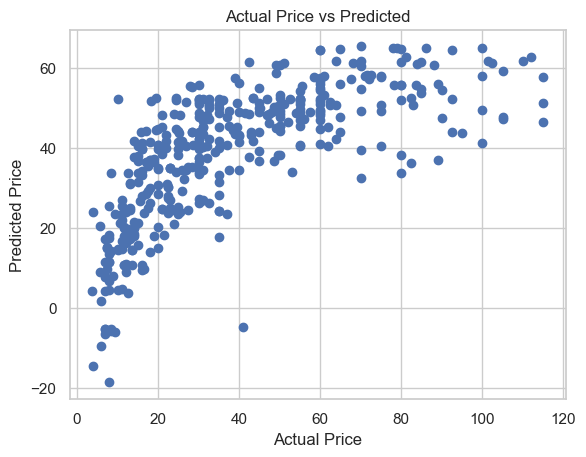

In [94]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted')
plt.show()